<a href="https://colab.research.google.com/github/manku13/PRODIGY_ML_03/blob/main/Dog_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

This is the classification problem in which we've train dataset and test dataset.Each of which contains dog and cat images but without labels.

### Description

> In this problem we'll have to write a algorithm to classify whether images contains either a dog or a cat.

As it seems easy for humans to classify them as cats or dogs but for computer is much more difficult to differentiate between them.



Importing the important libraries for:

  1. Data Unzipping
  2. For making appropriate directories
  3. Categorizing them to a particular folder
  4. Visualizing images
  5. Creating the model
  6. Setting parameters
  7. Training you model

In [28]:
import pandas as pd
import numpy as np
import os
import cv2
from zipfile import ZipFile
import matplotlib.pyplot as plt
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

import warnings
warnings.filterwarnings('ignore')

This part is already do so we don't have to again executing it and making mess.

As unzipping the data is one time go.


In [29]:
# # Unzipping the file

# with ZipFile("drive/MyDrive/Dog-Cat Classification/dogs-vs-cats.zip") as f:
#   f.extractall("drive/MyDrive/Dog-Cat\ Classification")

In [30]:
# # Now unzipping the train and test files
# with ZipFile("drive/MyDrive/Dog-Cat\ Classification/train.zip") as f:
#   f.extractall("drive/MyDrive/Dog-Cat\ Classification")

In [31]:
# with ZipFile("drive/MyDrive/Dog-Cat\ Classification/test1.zip") as f:
#   f.extractall("drive/MyDrive/Dog-Cat\ Classification")

### Assigning data

Assiging train and test data into diffrent variables.

And also giving a fix image size and predefining the Batch size.

In [32]:
data_dir = "drive/MyDrive/Dog-Cat\ Classification/train"
test_dir = "drive/MyDrive/Dog-Cat\ Classification/test1"

height = 150
width = 150

BATCH_SIZE = 8

In [33]:
np.random.seed(0)
tf.random.set_seed(0)


### Creating directory for Dogs and Cats.

> Here we're diffrentiating the image whether it is of dog or either of cat.

The dog folder contains all dogs images and the cat folder contains all cat images.

We've commented this code also because once we've make directories containing respective images so now we no longer have to create a directories as they are already exist.

This is do due to fast and reexecuting of all the cell with out giving any error (e.g. `this directory already exist`), in the situtation when the colab needs to reconnect and since it reconnected all the progress is lost.

In [ ]:
# for image_name in os.listdir("drive/MyDrive/Dog-Cat\ Classification/train"):
#     src = os.path.join("drive/MyDrive/Dog-Cat\ Classification/train", image_name)

#     label = image_name.split(".")[0]
#     if label == "cat":
#         dest = os.path.join(data_dir, "cat")
#     else:
#         dest = os.path.join(data_dir, "dog")

#     if os.path.exists(dest) is False:
#         os.makedirs(dest)

#     shutil.move(src, dest)

In [ ]:
# os.mkdir("drive/MyDrive/Dog-Cat\ Classification/saved_models")

### Visualizing images.

Here we are now able to visualizing each images in either of the two folders.

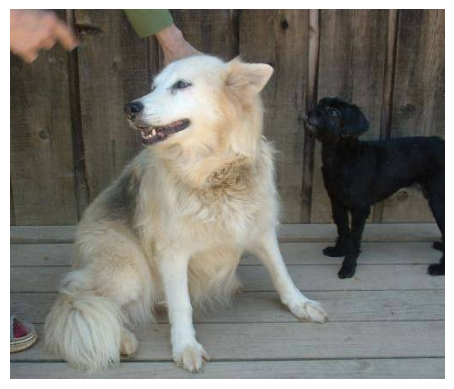

In [34]:
# Visualizing image

image = cv2.imread(data_dir + "/dog" + "/dog.5678.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis(False)
plt.show()

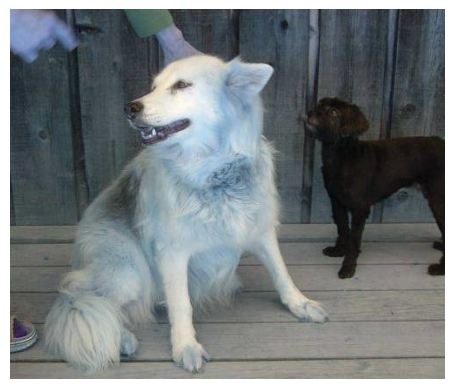

In [35]:
# Visualizing image but without using color converter from "BGR2RGB"

image = cv2.imread(data_dir + "/dog" + "/dog.5678.jpg", cv2.IMREAD_COLOR)
plt.imshow(image)
plt.axis(False)
plt.show()

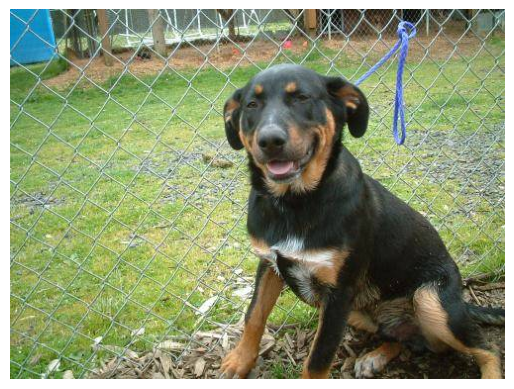

In [36]:
image = cv2.imread(data_dir + "/dog" + "/dog.1923.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis(False)
plt.show()

### Converting the data specific format

Here we're converting train and valid_test data into a specific format which will be handled easily by our Deep learning model.

As Deep leaning model needs to have a data with specific format so that it can utizite the data with maximum of its power.



In [37]:
train_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                        labels = "inferred",
                                                        label_mode = "int",
                                                        class_names = ['cat', 'dog'],
                                                        color_mode = "rgb",
                                                        batch_size = BATCH_SIZE,
                                                        image_size = (height, width),
                                                        shuffle = True,
                                                        seed = 0,
                                                        validation_split = 0.2,
                                                        subset = "training")

valid_test_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                             labels = "inferred",
                                                             label_mode = "int",
                                                             class_names = ["cat", "dog"],
                                                             color_mode = "rgb",
                                                             batch_size = BATCH_SIZE,
                                                             image_size = (height, width),
                                                             shuffle = True,
                                                             seed = 0,
                                                             validation_split = 0.2,
                                                             subset = "validation")

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


#### Cardinality of data:

> It is the number of elements in a dataset of each batch.

In [38]:
print("The Cardinality of trian data is : ", tf.data.experimental.cardinality(train_data).numpy())
print("The Cardinality of test+valid data is : ", tf.data.experimental.cardinality(valid_test_data).numpy())

The Cardinality of trian data is :  2500
The Cardinality of test+valid data is :  625


In [39]:
# Splitting the data into valid and test

valid_data = valid_test_data.take(int(0.5 * tf.data.experimental.cardinality(valid_test_data).numpy()))

test_data = valid_test_data.skip(int(0.5 * tf.data.experimental.cardinality(valid_test_data).numpy()))


In [40]:
print("The cardinality of train data is: ", tf.data.experimental.cardinality(train_data).numpy())
print("The cardinality of validation data is: ", tf.data.experimental.cardinality(valid_data).numpy())
print("The cardinality of test data is: ", tf.data.experimental.cardinality(test_data).numpy())

The cardinality of train data is:  2500
The cardinality of validation data is:  312
The cardinality of test data is:  313


#### Rescaling the data

Rescaling the data is very important as it becomes easy for computer to handle it efficiently and normalizing the data for better preformance.

In [41]:
def rescaling_data(images,labels):
    return images / 255, labels

In [42]:
train_data = train_data.map(rescaling_data)
valid_data = valid_data.map(rescaling_data)
test_data = test_data.map(rescaling_data)

In [43]:
data_augmentation = keras.models.Sequential([
    layers.RandomBrightness(0.2, value_range = (0,1)),
    layers.RandomContrast(0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1, 0.1)
])

In [44]:
train_data = train_data.prefetch(tf.data.AUTOTUNE).cache()

### Creating the model

Now its time to create a Deep leaning model. Here we're creating multiple layers of neural layer with specific input data and output to feed onto each layers.

Creating many layers do not certainly involve in better performance of the overall model. It might get out computer to crash or lead out kernel to dead.

This all is caused due to extensive use of hardward memory (`use of RAM`) which lead to the exhuasting of memory and no longer to handle it and may lead to crash the program.

Creating many layers to our model make our model very time consuming to train.

> So it is adviced to keep to layers of model as optimized as it could be.

In [45]:
def conv_block(inputs, filters, kernel_size):
    x = layers.Conv2D(filters, kernel_size, 1, "same", kernel_initializer="he_normal", use_bias=False)(inputs)
    x = layers.BatchNormalization(axis=-1)(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(2, 2)(x)
    return x

inputs = layers.Input((height, width, 3))
x = data_augmentation(inputs)

x = conv_block(x, 32, (7, 7))
x = conv_block(x, 64, (3, 3))
x = conv_block(x, 128, (3, 3))
x = conv_block(x, 128, (3, 3))
x = conv_block(x, 128, (3, 3))

x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.models.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      4704      
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                          

### Compiling our model

While compiling we've to keep a callbacks list which are of very usefull as it could lead our model to be very time efficient.

Creating a callback is very essential. If our model during it's epoch time does not lead to significate increase in accuracy then the work of callback is to stop the training of our model and which leads to increase in `time efficiency`.

In [46]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics="accuracy")

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/kaggle/working/saved_models",
        monitor='val_loss',
        save_best_model=True),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        verbose=1)
]

This is our early stopping callback

In [47]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
history = model.fit(
    train_data,
    epochs=30,
    verbose=1,
    shuffle=True,
    callbacks=early_stopping,
    validation_data=valid_data
)

Epoch 1/30
2500/2500 [==============================] - 118s 40ms/step - loss: 0.6425 - accuracy: 0.6537 - val_loss: 0.4884 - val_accuracy: 0.7704
Epoch 2/30
2500/2500 [==============================] - 43s 17ms/step - loss: 0.4699 - accuracy: 0.7779 - val_loss: 0.4612 - val_accuracy: 0.7881
Epoch 3/30
2500/2500 [==============================] - 42s 17ms/step - loss: 0.3734 - accuracy: 0.8331 - val_loss: 0.3190 - val_accuracy: 0.8578
Epoch 4/30
2500/2500 [==============================] - 48s 19ms/step - loss: 0.3121 - accuracy: 0.8659 - val_loss: 0.3065 - val_accuracy: 0.8618
Epoch 5/30
2500/2500 [==============================] - 44s 17ms/step - loss: 0.2689 - accuracy: 0.8857 - val_loss: 0.2464 - val_accuracy: 0.8966
Epoch 6/30
2500/2500 [==============================] - 41s 17ms/step - loss: 0.2412 - accuracy: 0.9014 - val_loss: 0.2061 - val_accuracy: 0.9147
Epoch 7/30
2500/2500 [==============================] - 49s 20ms/step - loss: 0.2107 - accuracy: 0.9115 - val_loss: 0.2112 

### Saving model

Saving our model is very important as it will save us from training our model again and again incase of `server disconnet` or `kernel dead`.

As loading our previously trained model and using it will save significant time and resources.


In [ ]:
# model.save("drive/MyDrive/Dog-Cat\ Classification/saved_models/my_model.h5")

In [48]:
# Now loading the previously trained model
model = tf.keras.models.load_model("drive/MyDrive/Dog-Cat\ Classification/saved_models/my_model.h5")

### Visualizing our model performance

This function is created to visualize how well our model has perfomed and show case it in output with proper labels and `confidence level` of our model.

In [49]:
def visualize_result(data, model, n):
    shuffled_data = data.unbatch().shuffle(buffer_size=len(data))
    taken_data = shuffled_data.take(n)
    sample_data = list(iter(taken_data))
    predictions = model.predict(taken_data.batch(n), verbose=0)

    n_rows = 2
    n_cols = n // 2
    fig, ax = plt.subplots(n_rows, n_cols)

    for row in range(n_rows):
        for col in range(n_cols):
            image = np.array(sample_data[row*n_cols+col][0])
            label = sample_data[row*n_cols+col][1].numpy()
            pred_proba = predictions[row*n_cols+col][0]
            pred = tf.round(pred_proba).numpy()
            ax[row, col].imshow(image)
            ax[row, col].set_title(
                f"prediction: cat\nconfidence: {1-pred_proba : .2f}" if pred == 0
                    else f"prediction: dog\nconfidence: {pred_proba : .2f}",
                c='green' if label == pred else 'red'
                )
            ax[row, col].axis(False)

    fig.tight_layout()
    plt.show()

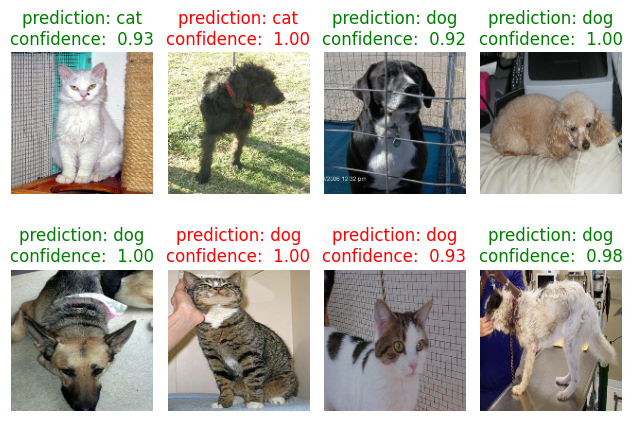

In [50]:
visualize_result(valid_data, model, 8)

In [51]:
model.evaluate(valid_data)

312/312 [==============================] - 7s 21ms/step - loss: 0.2031 - accuracy: 0.9295


[0.20309649407863617, 0.9294871687889099]

In [52]:
model.evaluate(test_data)

313/313 [==============================] - 227s 712ms/step - loss: 0.2190 - accuracy: 0.9281


[0.21898090839385986, 0.9281150102615356]

### Model Performance

`Our model has perform with 92% of accuracy on valid data`

`Our model has perform with 92% of accuracy on test data`

In [ ]:
images_list = []
labels_list = []

# Iterate through the dataset and collect images and labels
for image, label in test_data.unbatch():
    images_list.append(image.numpy())
    labels_list.append(label.numpy())

# Convert the lists to NumPy arrays
images_array = np.array(images_list)
labels_array = np.array(labels_list)

In [ ]:
predictions = np.int0(model.predict(images_array) > 0.5).reshape(-1)
predictions

79/79 [==============================] - 2s 12ms/step


array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
actual = labels_array
actual

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

<Axes: >

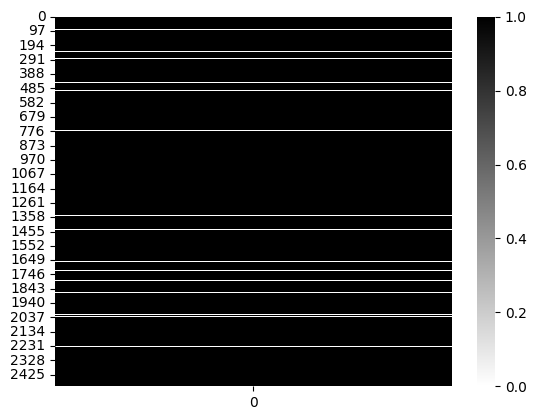

In [ ]:
map_accuracy = (predictions == actual).reshape(-1, 1)
import seaborn as sns

sns.heatmap(map_accuracy, cmap='binary')